# 01  BTC Price Data Collection

## Objective
The goal of this notebook is to collect, clean, and visualize daily BTC market data.
This notebook focuses only on **data ingestion and validation**, not analysis or prediction.

## Why this step matters
All downstream risk and crash analysis depends on the quality and structure of raw price data.
To ensure reproducibility, raw data is collected once and stored separately before analysis.


In [3]:
!pip install ccxt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.7/139.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 15.0 MB/s eta 0:00:00


## Data Source

- Exchange: Binance
- Asset: BTC/USDT
- Timeframe: Daily (1D)
- Data Type: OHLCV (Open, High, Low, Close, Volume)

Daily data is used because market crashes are structural events that unfold over days or weeks,
and lower timeframes introduce noise that can obscure risk regimes.


In [4]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
exchange = ccxt.binance()
bars = exchange.fetch_ohlcv(symbol='BTC/USDT',timeframe='1d',limit=1500)
df = pd.DataFrame(bars,columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('date', inplace=True)
df.drop(columns='timestamp', inplace=True)
df.head()


,open,high,low,close,volume
date,,,,,
2023-05-09,27668.80,27818.00,27353.00,27628.27,40113.31069
2023-05-10,27628.28,28331.42,26777.00,27598.75,71155.11355
2023-05-11,27598.74,27630.14,26702.05,26968.62,47635.31365
2023-05-12,26968.61,27091.12,25811.46,26795.01,67207.93494
2023-05-13,26795.01,27045.45,26692.03,26775.28,22814.90421


## Data Structure

The dataset is converted into a time-indexed pandas DataFrame with the following columns:

- open, high, low, close: price levels for each trading day
- volume: traded volume for the day

The date column is set as the index to enable time-series operations such as
returns, drawdowns, and regime detection in later stages.


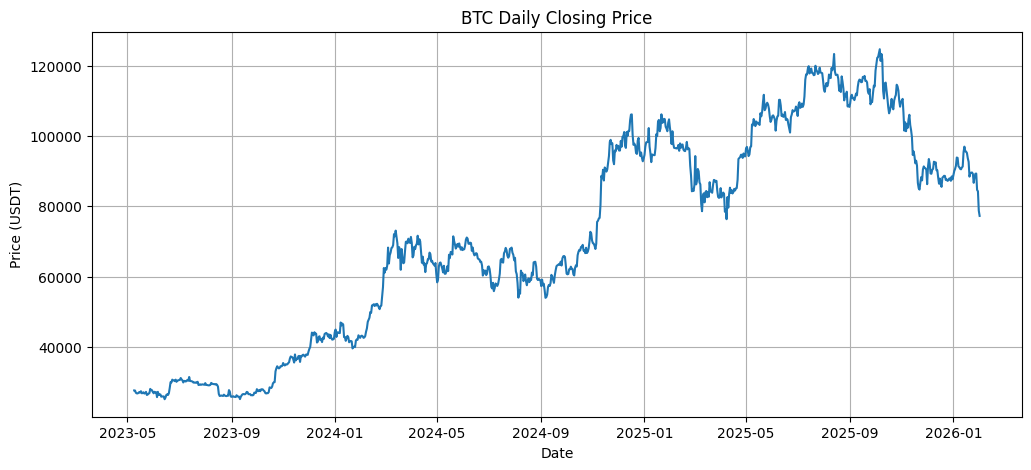

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['close'])
plt.title("BTC Daily Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.grid(True)
plt.show()

## Initial Observations

The BTC price series shows periods of strong uptrends followed by sharp drawdowns.
Major market crashes appear as extended peak-to-trough declines rather than single-day events.

This visualization helps build intuition about market regimes and will later be used
to validate whether risk signals rise before large drawdowns.


In [8]:
df.to_csv("btc_daily.csv")

## Next Step

Raw BTC price data has been successfully collected and stored.
The next stage of the project will define market crashes quantitatively
using drawdowns and stress regime labeling.

Notebook: 02_crash_definition.ipynb
